In [5]:
import os
import glob
import numpy as np
import PIL
from PIL import Image
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
import cv2
import pandas as pd
#import albumentations

import tensorflow as tf
from tensorflow.keras.layers import Input,GlobalAveragePooling2D,GlobalMaxPooling2D,Dense




In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
!unzip  /content/train_set -d /content/train_set




Streaming output truncated to the last 5000 lines.
  inflating: /content/train_set/train_set/1954.jpg  
  inflating: /content/train_set/train_set/1955.jpg  
  inflating: /content/train_set/train_set/1956.jpg  
  inflating: /content/train_set/train_set/1957.jpg  
  inflating: /content/train_set/train_set/1958.jpg  
  inflating: /content/train_set/train_set/1959.jpg  
  inflating: /content/train_set/train_set/196.jpg  
  inflating: /content/train_set/train_set/1960.jpg  
  inflating: /content/train_set/train_set/1961.jpg  
  inflating: /content/train_set/train_set/1962.jpg  
  inflating: /content/train_set/train_set/1963.jpg  
  inflating: /content/train_set/train_set/1964.jpg  
  inflating: /content/train_set/train_set/1965.jpg  
  inflating: /content/train_set/train_set/1966.jpg  
  inflating: /content/train_set/train_set/1967.jpg  
  inflating: /content/train_set/train_set/1968.jpg  
  inflating: /content/train_set/train_set/1969.jpg  
  inflating: /content/train_set/train_set/197.jpg

In [2]:
!unzip /content/test_set -d /content/test_set

Archive:  /content/test_set.zip
   creating: /content/test_set/test_set/
  inflating: /content/test_set/test_set/0.png  
  inflating: /content/test_set/test_set/1.png  
  inflating: /content/test_set/test_set/10.png  
  inflating: /content/test_set/test_set/100.png  
  inflating: /content/test_set/test_set/1000.png  
  inflating: /content/test_set/test_set/1001.png  
  inflating: /content/test_set/test_set/1002.png  
  inflating: /content/test_set/test_set/1003.png  
  inflating: /content/test_set/test_set/1004.png  
  inflating: /content/test_set/test_set/1005.png  
  inflating: /content/test_set/test_set/1006.png  
  inflating: /content/test_set/test_set/1007.png  
  inflating: /content/test_set/test_set/1008.png  
  inflating: /content/test_set/test_set/1009.png  
  inflating: /content/test_set/test_set/101.png  
  inflating: /content/test_set/test_set/1010.png  
  inflating: /content/test_set/test_set/1011.png  
  inflating: /content/test_set/test_set/1012.png  
  inflating: /conte

In [6]:

path_to_train_images='/content/train_set/train_set'
path_to_test_images='/content/test_set/test_set'

path_to_train_labels='/content/train_labels.csv'


labels=pd.read_csv(path_to_train_labels)


In [7]:
labels

,dir,label1,label2
0,0.jpg,2,6
1,1.jpg,2,2
2,2.jpg,1,0
3,3.jpg,1,0
4,4.jpg,1,6
...,...,...,...
6057,6057.jpg,2,5
6058,6058.jpg,2,6
6059,6059.jpg,0,5
6060,6060.jpg,0,5


In [8]:
test_paths=glob.glob(path_to_test_images+'/*')
test_paths

['/content/test_set/test_set/2302.png',
 '/content/test_set/test_set/2073.png',
 '/content/test_set/test_set/709.png',
 '/content/test_set/test_set/2652.png',
 '/content/test_set/test_set/2935.png',
 '/content/test_set/test_set/551.png',
 '/content/test_set/test_set/1179.png',
 '/content/test_set/test_set/1684.png',
 '/content/test_set/test_set/2155.png',
 '/content/test_set/test_set/1926.png',
 '/content/test_set/test_set/3340.png',
 '/content/test_set/test_set/3400.png',
 '/content/test_set/test_set/1731.png',
 '/content/test_set/test_set/945.png',
 '/content/test_set/test_set/2266.png',
 '/content/test_set/test_set/1856.png',
 '/content/test_set/test_set/2057.png',
 '/content/test_set/test_set/1939.png',
 '/content/test_set/test_set/2926.png',
 '/content/test_set/test_set/1218.png',
 '/content/test_set/test_set/3080.png',
 '/content/test_set/test_set/1323.png',
 '/content/test_set/test_set/1161.png',
 '/content/test_set/test_set/1253.png',
 '/content/test_set/test_set/3099.png',
 '/

In [9]:
train_paths=glob.glob(path_to_train_images+'/*')
test_paths=glob.glob(path_to_test_images+'/*')


num_train=len(train_paths)
num_test=len(test_paths)




In [10]:
num_train

6062

In [11]:
num_test

3929

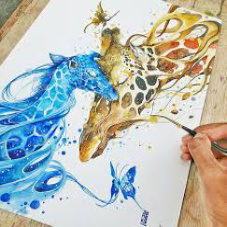

In [12]:
sample_image= Image.open(train_paths[3])
display(sample_image)


In [13]:
sample_image = asarray(sample_image)

image_size=sample_image.shape

In [14]:
image_size

(227, 227, 3)

In [15]:
# training_images=np.zeros((num_train,image_size[0],image_size[1],image_size[2]))
train_labels=np.zeros((num_train,1))


test_images=np.zeros((num_test,image_size[0],image_size[1],image_size[2]))
test_labels=np.zeros((num_test,1))

In [16]:
#retrieve image name from its path
train_paths[10].split('train_set')[-1].split('\\')[-1]

'/3193.jpg'

In [17]:
#retrieve image name from its path
test_paths[100].split('test_set')[-1].split('\\')[-1]

'/3337.png'

In [18]:
train_names=[]
train_path=[]
# loading train images and their associated labels
for i in range(num_train):
    
    train_path.append(path_to_train_images+'/'+str(i)+'.jpg')
    

    image_name=str(i)+'.jpg'
    
    idx=labels['dir']== image_name
    label_of_this_image=list(labels.loc[idx,'label2'])[0]
    train_labels[i,0]=label_of_this_image
    train_names.append(image_name)
    

In [19]:
train_series_path = pd.Series(train_path)
train_series_path # vThis will be used for batch generator

0          /content/train_set/train_set/0.jpg
1          /content/train_set/train_set/1.jpg
2          /content/train_set/train_set/2.jpg
3          /content/train_set/train_set/3.jpg
4          /content/train_set/train_set/4.jpg
                        ...                  
6057    /content/train_set/train_set/6057.jpg
6058    /content/train_set/train_set/6058.jpg
6059    /content/train_set/train_set/6059.jpg
6060    /content/train_set/train_set/6060.jpg
6061    /content/train_set/train_set/6061.jpg
Length: 6062, dtype: object

In [22]:
train_labels[0]

array([6.], dtype=float32)

In [23]:
train_labels=train_labels.astype(np.float32)

In [24]:
train_names[0]

'0.jpg'

In [25]:
test_names=[]

# loading train images and their associated labels
for i in range(num_test):
    
    test_path=path_to_test_images+'/'+str(i)+'.png'
    # load the image
    image = Image.open(test_path)
    image = asarray(image)
    

    test_images[i]=image
    test_names.append(str(i)+'.png')
    
    
    

In [26]:
test_images[-1]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [27]:
test_images=test_images.astype(np.float32)

In [28]:
test_names[-1]

'3928.png'

In [29]:
# Onehot encoding of labels
enc=OneHotEncoder(sparse=False)

enc.fit(train_labels)

onehot_train_labels=enc.transform(train_labels)

In [30]:
onehot_train_labels=onehot_train_labels.astype(np.int32)

In [31]:
onehot_train_labels.dtype

dtype('int32')

In [32]:
onehot_train_labels[0]

array([0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [33]:
base_model=tf.keras.applications.efficientnet.EfficientNetB0(include_top=False,weights='imagenet',input_shape=image_size)
base_model.summary()

for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

#freeze all convolutional resnet50 layers
for layer in base_model.layers:
    layer.trainable = False

#training the last two blocks
for layer in base_model.layers[:221]:
    layer.trainable = False
for layer in base_model.layers[221:]:
    layer.trainable = True


inputs = Input(shape=image_size)


x = base_model(inputs)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = GlobalMaxPooling2D()(x)

x=Dense(512,activation='relu')(x)

outputs = Dense(onehot_train_labels.shape[1],activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.summary()



16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 227, 227, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 227, 227, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [34]:
from skimage.io import imread
class my_batch_generator(tf.keras.utils.Sequence):
    def __init__(self, dpath, Y=None, batch_size=128,im_size=(1000,1000),
                 aug_fun=None, n_classes=None, subset="train", shuffle=False,
                 preprocess=None):
        # dpath (a series with n_sample length) : data path
        # Y (n_samples,n_classes) : label data (class information or binary codes)
        # im_size: The input image size for network
        # preprocess: required preprocessing function for each network
        super().__init__()
        self.im_size = im_size
        self.dpath = dpath
        self.Y = Y
        self.shuffle = shuffle
        self.subset = subset
        self.batch_size = batch_size
        self.preprocess = preprocess
        self.aug_fun = aug_fun
        self.n_classes = n_classes
        if (Y is None and subset=="train"):
            raise ValueError('True labels can not be None for training')
        self.on_epoch_end()
    
    
    def __len__(self):
        return int(np.ceil(len(self.dpath) / self.batch_size))
    
    
    def on_epoch_end(self):
        self.indexes = np.arange(len(self.dpath))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    
    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        batch_data = np.empty((len(indexes),self.im_size[0],self.im_size[1],3),dtype=np.float32)
        y = np.empty((len(indexes),self.n_classes),dtype=np.float32)
        for i,f in enumerate(self.dpath.iloc[indexes]):
            temp_mat = imread(f)
            batch_data[i,:,:,:] = temp_mat.astype(np.float32)
            if self.subset == 'train':
                y[i,:] = self.Y[indexes[i],:]
            if self.aug_fun is not None:
                data = {"image": batch_data[i,]}
                augmented = self.aug_fun(**data)
                batch_data[i,] = augmented["image"]
        
        if self.preprocess!=None: batch_data = self.preprocess(batch_data.astype(np.uint8))
        if self.subset == 'train': return batch_data, y
        else: return batch_data
        
        
# class my_batch_generator(tf.keras.utils.Sequence):
#     def __init__(self, X, Y=None, batch_size = 128, im_size=(224,224), 
#                  aug_fun=None, n_classes=None, subset="train", shuffle=False,
#                  preprocess=None):
#         # X (n_samples,n_features) : train or test data. 
#         # Y (n_samples,n_classes) : label data (class information or binary codes)
#         # im_size: The input image size for network 
#         # preprocess: required preprocessing function for each network
#         super().__init__()
#         self.X = X
#         self.Y = Y
#         self.shuffle = shuffle
#         self.subset = subset
#         self.batch_size = batch_size
#         self.preprocess = preprocess
#         self.aug_fun = aug_fun
#         self.n_classes = n_classes
#         self.im_size = im_size
        
#         if (Y is None and subset=="train"):
#             raise ValueError('True labels can not be None for training')

#         self.on_epoch_end()

#     def __len__(self):
#         return int(np.ceil(len(self.X) / self.batch_size))
    
#     def on_epoch_end(self):
#         self.indexes = np.arange(len(self.X))
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)
    
#     def __getitem__(self, index):
#         indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
#         batch_data = np.empty((len(indexes),self.im_size[0],self.im_size[1],3),dtype=np.float32)
#         y = np.empty((len(indexes),self.n_classes),dtype=np.float32)
#         for i in range(len(indexes)):
#             temp_mat = self.X[indexes[i],:]
#             #batch_data[i,:,:,:] = (cv2.resize(temp_mat,self.im_size[-1::-1])).astype(np.float32)
#             batch_data[i,:,:,:] = temp_mat.astype(np.float32)
#             if self.subset == 'train': 
#                 y[i,:] = self.Y[indexes[i],:] 
#             if self.aug_fun is not None:
#                 data = {"image": batch_data[i,]}
#                 augmented = self.aug_fun(**data)
#                 batch_data[i,] = augmented["image"]

#         if self.preprocess!=None: batch_data = self.preprocess(batch_data)
#         if self.subset == 'train': return batch_data, y
#         else: return batch_data     


In [35]:
preprocess=tf.keras.applications.efficientnet.preprocess_input

# from albumentations import HorizontalFlip, VerticalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90, \
#     Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue, \
#     IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine, \
#     IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose


# aug_fun = Compose([HorizontalFlip(p=0.5),
#                    ShiftScaleRotate(shift_limit=0.1, scale_limit=(0, 0.2), 
#                                     rotate_limit=10, p=0.5)], p=1.)

# train_batches = my_batch_generator(training_images, Y=onehot_train_labels, im_size=image_size,aug_fun=aug_fun,
#                               batch_size=16, n_classes=7, 
#                               subset="train", shuffle=True, preprocess=preprocess)

train_batches = my_batch_generator(train_series_path, Y=onehot_train_labels, im_size=image_size,
                              batch_size=16, n_classes=7, 
                              subset="train", shuffle=True, preprocess=preprocess)

# test_batches = my_batch_generator(test_images,  batch_size=16,im_size=image_size,  
#                           n_classes=7,  subset="test", shuffle=False, preprocess=preprocess)

In [36]:
train_batches[0][0].shape

(16, 227, 227, 3)

In [37]:
train_batches[0][0]

array([[[[244, 244, 244],
         [247, 247, 247],
         [250, 250, 250],
         ...,
         [254, 254, 254],
         [253, 253, 253],
         [251, 251, 251]],

        [[248, 248, 248],
         [250, 250, 250],
         [252, 252, 252],
         ...,
         [253, 253, 253],
         [252, 252, 252],
         [251, 251, 251]],

        [[252, 252, 252],
         [252, 252, 252],
         [252, 252, 252],
         ...,
         [253, 253, 253],
         [252, 252, 252],
         [251, 251, 251]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [38]:
train_batches[0][1]

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
   metrics=[tf.keras.metrics.CategoricalAccuracy()])



model.fit(train_batches, epochs=30, shuffle=True)
#model.fit(training_images[0:300],onehot_train_labels[0:300], epochs=100, shuffle=True)

Epoch 1/30
 58/379 [===>..........................] - ETA: 4:40 - loss: 1.8439 - categorical_accuracy: 0.5097

KeyboardInterrupt: ignored

In [40]:
test_preds=model.predict(test_images)
test_preds=np.argmax(test_preds,axis=1)

In [41]:
test_preds

array([0, 5, 6, ..., 5, 1, 5])

In [ ]:
test_names

['0.png',
 '1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '25.png',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '30.png',
 '31.png',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '40.png',
 '41.png',
 '42.png',
 '43.png',
 '44.png',
 '45.png',
 '46.png',
 '47.png',
 '48.png',
 '49.png',
 '50.png',
 '51.png',
 '52.png',
 '53.png',
 '54.png',
 '55.png',
 '56.png',
 '57.png',
 '58.png',
 '59.png',
 '60.png',
 '61.png',
 '62.png',
 '63.png',
 '64.png',
 '65.png',
 '66.png',
 '67.png',
 '68.png',
 '69.png',
 '70.png',
 '71.png',
 '72.png',
 '73.png',
 '74.png',
 '75.png',
 '76.png',
 '77.png',
 '78.png',
 '79.png',
 '80.png',
 '81.png',
 '82.png',
 '83.png',
 '84.png',
 '85.png',
 '86.png',
 '87.png',
 '88.png',
 '89.png',
 '90.png',
 '91.png'

In [ ]:
df = pd.DataFrame(list(zip(test_names,list(test_preds))),
               columns =['id', 'label'])

In [ ]:
df

,id,label
0,0.png,5
1,1.png,5
2,2.png,5
3,3.png,6
4,4.png,5
...,...,...
3924,3924.png,5
3925,3925.png,6
3926,3926.png,4
3927,3927.png,1


In [ ]:
df.set_index('id', inplace=True)
df

,label
id,
0.png,5
1.png,5
2.png,5
3.png,6
4.png,5
...,...
3924.png,5
3925.png,6
3926.png,4


In [ ]:
df.to_csv('A_baseline_test_pred.csv')